Mean interarrival: 0.05 µs
SCV: 1.010


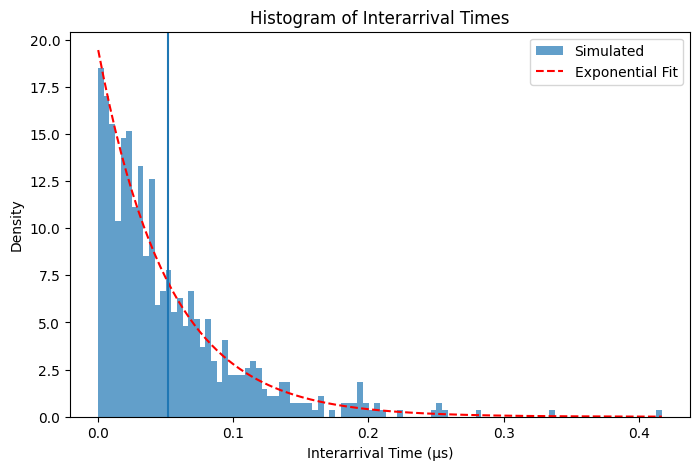

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sites = 9
streams_per_sector = 8*3*3 # ( 8 mimo streams *3 cels * 3 sectors)
n_flows = sites*streams_per_sector
T_period = 33.33e-6  # due to numerlogy selection
n_arrivals_per_flow = 100000

# Simular offsets uniformes en [0, T_period]
offsets = np.random.uniform(0, T_period, n_flows)

# Generar llegadas por flujo
all_arrivals = []
for offset in offsets:
    
    arrivals = offset + np.arange(n_arrivals_per_flow) * T_period
    all_arrivals.extend(arrivals)

# Combinar y ordenar
all_arrivals = np.sort(all_arrivals)
interarrivals = np.diff(all_arrivals)

# Resultados básicos
mean_interarrival = np.mean(interarrivals)
var_interarrival = np.var(interarrivals)
scv = var_interarrival / mean_interarrival**2

print(f"Mean interarrival: {mean_interarrival*1e6:.2f} µs")
print(f"SCV: {scv:.3f}")

# Histograma
plt.figure(figsize=(8,5))
plt.hist(interarrivals*1e6, bins=100, density=True, alpha=0.7, label='Simulated')
plt.title('Histogram of Interarrival Times')
plt.xlabel('Interarrival Time (µs)')
plt.ylabel('Density')


# Exponential fit
from scipy.stats import expon
x = np.linspace(0, np.max(interarrivals)*1e6, 200)
pdf = expon.pdf(x, scale=mean_interarrival*1e6)
plt.plot(x, pdf, 'r--', label='Exponential Fit')

plt.axvline(mean_interarrival*1e6)
plt.legend()
plt.show()

In [ ]:
# -------------------------
# Save histogram
hist_vals, bin_edges = np.histogram(interarrivals*1e6, bins=100, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

np.savetxt("./resultstraffic/histogram_data.txt", np.column_stack([bin_centers, hist_vals]),
           header="InterarrivalTime(µs) Density", fmt="%.6f")

# -------------------------
# Save exp fit
x_fit = np.linspace(0, np.max(interarrivals)*1e6, 200)
pdf_fit = expon.pdf(x_fit, scale=mean_interarrival*1e6)

np.savetxt("./resultstraffic/exp_fit.txt", np.column_stack([x_fit, pdf_fit]),
           header="InterarrivalTime(µs) ExponentialPDF", fmt="%.6f")

# -------------------------
# Save average value
with open("./resultstraffic/mean_interarrival.txt", "w") as f:
    f.write(f"{mean_interarrival*1e6:.6f}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


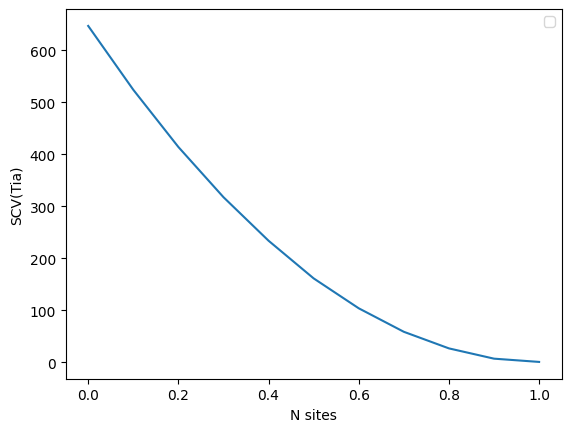

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
nsite = 9

streams_per_sector = 8*3*3 # ( 8 mimo streams *3 cels * 3 sectors)
n_flows = nsite*streams_per_sector
T_period = 33.33e-6  # due to numerlogy selection
n_arrivals_per_flow = 100000
# Simular offsets uniformes en [0, T_period]
factors = np.arange(0, 1.1, 0.1)

all_scvs = []
for factor in factors:

    offsets = np.random.uniform(0, T_period*factor, n_flows)
    # Generar llegadas por flujo
    all_arrivals = []
    for offset in offsets:
        
        arrivals = offset + np.arange(n_arrivals_per_flow) * T_period
        all_arrivals.extend(arrivals)

    # Combinar y ordenar
    all_arrivals = np.sort(all_arrivals)
    interarrivals = np.diff(all_arrivals)

    # Resultados básicos
    mean_interarrival = np.mean(interarrivals)
    var_interarrival = np.var(interarrivals)
    scv = var_interarrival / mean_interarrival**2
    all_scvs.append(scv)
    
plt.plot(factors, all_scvs)
plt.xlabel("N sites")
plt.ylabel("SCV(Tia)")
plt.legend()
plt.show()

# -------------------------
# Save SCV Tia 
#np.savetxt("Figura_SCVs_Jitterinit23.txt", [factors, all_scvs], fmt="%10.5f" ,delimiter=' ')